In [1]:
import os
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy.cluster.hierarchy import fcluster,linkage,dendrogram

In [2]:
data = pd.read_csv('./Groceries_dataset.csv')
data.columns = ['memberID', 'Date', 'itemName']
data.Date = pd.to_datetime(data.Date)
data.memberID = data['memberID'].astype('str')
data

C:\ou\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ou\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ou\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ou\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

,memberID,Date,itemName
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   memberID  38765 non-null  object        
 1   Date      38765 non-null  datetime64[ns]
 2   itemName  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


Member_number is a number that is unique for each customer. 
<br />
Date represents the date of the transaction
<br />
ItemDescription represents the corresponding product bought for this date.

In [4]:
# Checking for the missing values
nan_values = data.isna().sum()
nan_values

memberID    0
Date        0
itemName    0
dtype: int64

According to result above, there is no missing values for all columns.

In [5]:
Frequency_of_items = data.groupby(pd.Grouper(key='itemName')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['itemName'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

C:\ou\Python\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


Whole milk, vegetables and rolls/buns are top 3 products that sold for this groceries.

In [6]:
user_item = data.groupby(pd.Grouper(key='memberID')).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)
fig = px.bar(user_item.head(25), x='memberID', y='count',
             labels={'y': 'Number of Sales',
                     'count': 'Number of Items Bought'},
             color='count')
fig.update_layout(title_text='Top 20 Customers regarding Number of Items Bought',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

Top Customers regarding Number of Items bought

In [7]:
baskets = data.groupby(['memberID', 'itemName'])['itemName'].count().unstack().fillna(0).reset_index()
baskets

itemName,memberID,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Encoding the items that sold more than 1
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final

itemName,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
# Finding the most frequent items sold together
frequent_itemsets = apriori(baskets_final, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(10)

,support,itemsets
161,0.025141,"(shopping bags, butter)"
69,0.025141,(spread cheese)
405,0.025141,"(sliced cheese, whole milk)"
412,0.025141,"(whole milk, specialty bar)"
85,0.025141,"(pip fruit, beef)"
248,0.025141,"(domestic eggs, shopping bags)"
467,0.025141,"(tropical fruit, citrus fruit, whole milk)"
480,0.025141,"(whole milk, frankfurter, yogurt)"
119,0.025141,"(chocolate, bottled water)"
239,0.025141,"(root vegetables, dessert)"


In [10]:
# Creating association rules for indicating astecedent and consequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(20)

,antecedents,consequents,support,confidence,lift
877,(sausage),"(rolls/buns, yogurt)",0.035659,0.173101,1.554717
876,"(rolls/buns, yogurt)",(sausage),0.035659,0.320276,1.554717
454,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
459,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
874,"(sausage, rolls/buns)",(yogurt),0.035659,0.433022,1.530298
879,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
946,(sausage),"(other vegetables, yogurt)",0.037199,0.180573,1.500795
943,"(other vegetables, yogurt)",(sausage),0.037199,0.309168,1.500795
628,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518
633,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518


As you can see from the result above:

sausage --> yogurt, rolls/buns

root vegetables, whole milk --> shopping bags

rolls/buns, soda --> sausage

butter, whole milk --> yogurt,

and etc. have strong relationships.

Hierarchical clustering

In [11]:
hierarchical=baskets.iloc[:,1:].apply(lambda x:sum(x),axis=0)

[1 1 1 1 1 1 1 1 3 1 1 3 2 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 5 1 1 3 1 1 1 3 1
 3 1 1 1 1 1 1 1 1 1 1 5 2 1 1 1 1 1 1 2 1 1 3 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1 1 6 4 1]


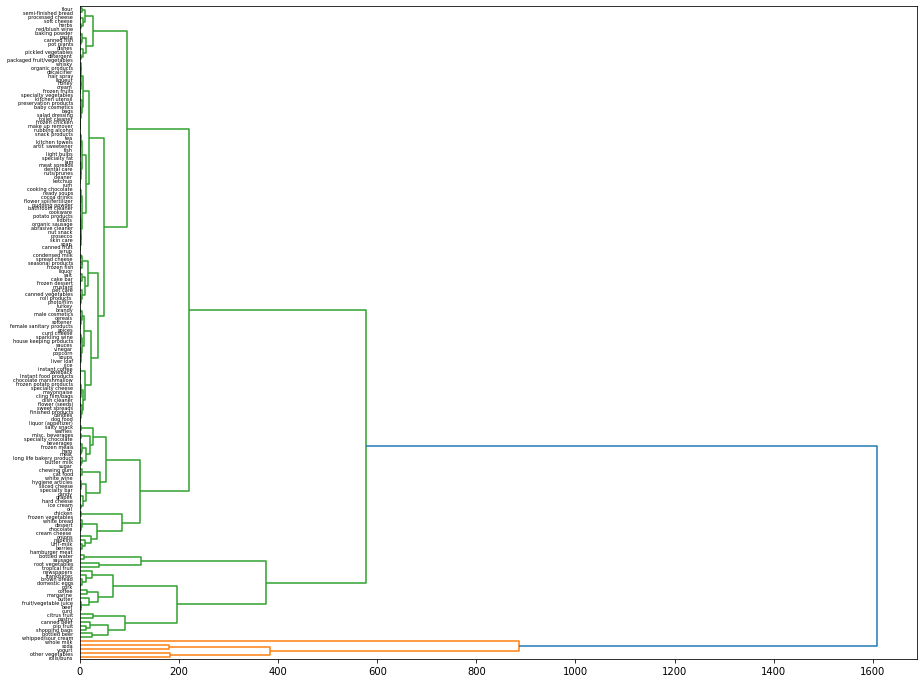

<Figure size 7200x7200 with 0 Axes>

In [40]:
randomMatrix =hierarchical.values.reshape(167,1).astype(int)
linked = linkage(randomMatrix, 'centroid')
resList=fcluster(linked,t=250,criterion='distance')
print(resList)

labelList = hierarchical.index
plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
          )
plt.figure(figsize=(100, 100))
plt.show()

In [42]:
res1=[True if i==1 else False for i in resList]
res2=[True if i==2 else False for i in resList]
res3=[True if i==3 else False for i in resList]
res4=[True if i==4 else False for i in resList]
res5=[True if i==5 else False for i in resList]
res6=[True if i==6 else False for i in resList]

In [50]:
type(res1)

list

In [47]:
data["itemName"]

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemName, Length: 38765, dtype: object